# This notebook will cover the parameterization of chitin polymers
Parameterization is carried out using AmberTools and GAFF (generalized amber forcefield)

# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class.

The second module to import is **sw_build_systems** so we can use the **BuildAmberSystems** class. 

The preceeding tutorials explain these python classes and how to use them.

In [2]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

# Setting up *Manager* and *Builder* classes

In [3]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

In [4]:
# Set up the builder by passing the manager to the "BuildAmberSystems" class
builder = BuildAmberSystems(manager)

Now we can generate the chitin trimer

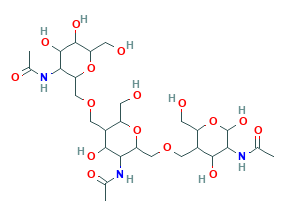

In [5]:
# Method to build a pdb file for the trimer and generate a residue code for it
builder.SmilesToPDB_GenResCode('CC(=O)NC1C(OC(C(C1O)COCC2C(C(C(C(O2)CO)O)O)NC(=O)C)CO)COCC3C(OC(C(C3O)NC(=O)C)O)CO', 'chitin_trimer')

In [6]:
# Now we can check if this .pdb file exists using a method from tutorial 1
pdb_file = manager.load_pdb_filepath("chitin_trimer")

# Print the pdb filepath
print(pdb_file)

/home/dan/polymersimulator/pdb_files/chitin_trimer.pdb


Now we need to parameterize the chitin trimer

In [7]:
# Parameterize the chitin trimer
builder.parameterize_mol("chitin_trimer")

KeyboardInterrupt: 

Now we need to generate polymeric unit residue codes

In [8]:
# Method for generating residue codes for different polymeric units - pass a trimer that has a residue code assigned
builder.GenRescode_4_PolyUnits("chitin_trimer")

Head code assigned:  hDH
Mainchain code assigned:  mDH
Tail code assigned:  tDH


In [9]:
# Check if the chitin trimer was parameterized by seeing if the mol2 file was generated
output = manager.load_mol2_filepath("chitin_trimer")
output

'/home/dan/polymersimulator/pdb_files/molecules/chitin_trimer/chitin_trimer.mol2'

Now we need to load the molecule in xleap and see what atoms need to be contained in the text files that will be passed to prepgen

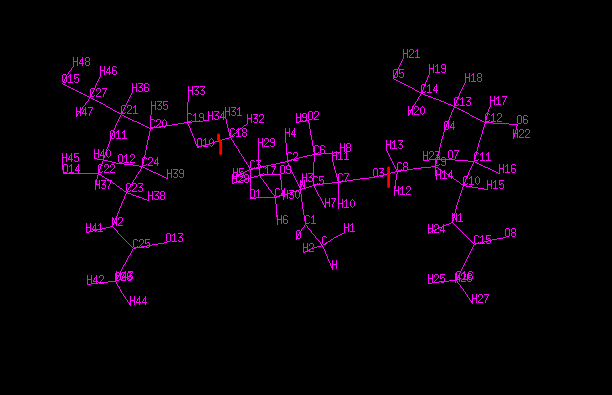

This is rather quite difficult - but mainly because the atom number are very hard to see.

Working on a way to visualise atom names easily - this is a prepi file and contains the correct information but it is very hard to read in xleap.

However, whilst an easier method is being worked out for this method - we can use some .prepi files from the literature https://pubs.rsc.org/en/content/articlelanding/2023/ma/d2ma00830k#:~:text=Chitosan%20is%20one%20of%20the,of%20polymeric%20chitosan%2FmiRNA%20complexes.

These files will have to made in command line with the following commands (from the main repository):

    ```shell
    cd pdb_files/molecules/chitin_trimer
    touch head_chitin_trimer.prepi
    touch mainchain_chitin_trimer.prepi
    touch tail_chitin_trimer.prepi
    ```
Then the information from the supplementary information of the paper will need to be copy/pasted into these files. The paper has 3 sets of prepi files: <br>

    - neutral chitosan (D-Glucosamine) labelled as; 0Yn, 4Yn, rYn
    - protonated chitosan (D-Glucosamine) labelled as: 0YnP, 4YnP, rYnP
    - acetylated chitosan (N-Acetyl-D-Glucosamine) labelled as; 0YB, 4YB, rYB

The file content required for the files you just generated will be the neutral chitosan prepi files. <br>

0Yn = head <br>
4Yn = mainchain <br>
rYn = tail <br>

Once the content is copied the correct residue from our database will need to be put into the files: <br>
    - Swap any instances of "0Yn" for the residue code in the database <br>
    - Change the "XXX.res" line to "yourrescode.res" <br>

Once this has been done - we can proceed in building systems for the chitin polymer.

Lets start by solvating a chitin decamer.

In [16]:
# Usage: builder.gen_polymer_pdb(base_trimer_name, number_of_polymeric_units)
output = builder.gen_polymer_pdb("chitin_trimer", 10)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/chitin_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source chitin_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./chitin_10_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3

In [17]:
output

'/home/dan/polymersimulator/pdb_files/systems/chitin_10_polymer/chitin_10_polymer.pdb'

In [18]:
builder.get_xyz_dists(output)

(12.984, 48.82, 5.863)

Lets visualise the chitin decamer that was built. <br>


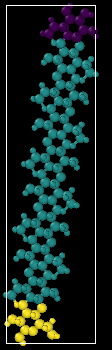 <br>

We will skip simply solvating the polymer and build the 2 systems shown previoulsy for the 3HB decamer.

In [19]:
# Method to generate a 3x3 array of a polymer
# Example Usage: output = buidler.build_3_3_polymer_array(base_trimer_name, polymer_name)

output = builder.build_3_3_polymer_array("chitin_trimer", "chitin_10_polymer")

cd /home/dan/polymersimulator/pdb_files/molecules/chitin_trimer
Current directory: /home/dan/polymersimulator/pdb_files/molecules/chitin_trimer
chitin_3_3_array.intleap
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source chitin_3_3_array.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./chitin_3_3_array.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/minicond

In [20]:
# Check the output variable
output

('chitin_10_polymer_3_3_array_10', 'unsolved_chitin_10_polymer_3_3_array')

We have amber topologies and coordinates for both of these systems. Keeping the topologies and coordinates for the unsolvated polymer array may be unneccesary so you can remove them if you wish.

In [21]:
# See if amber topologies and coordinates are generated
manager.load_amber_filepaths(output[0])

('/home/dan/polymersimulator/pdb_files/systems/chitin_10_polymer_3_3_array/chitin_10_polymer_3_3_array_10.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/chitin_10_polymer_3_3_array/chitin_10_polymer_3_3_array_10.rst7')

In [22]:
# See if amber topologies and coordinates are generated
manager.load_amber_filepaths(output[1])

('/home/dan/polymersimulator/pdb_files/systems/chitin_10_polymer_3_3_array/unsolved_chitin_10_polymer_3_3_array.prmtop',
 '/home/dan/polymersimulator/pdb_files/systems/chitin_10_polymer_3_3_array/unsolved_chitin_10_polymer_3_3_array.rst7')

It is a good idea to check the pdb file of the final system and unsolvated polymers too.

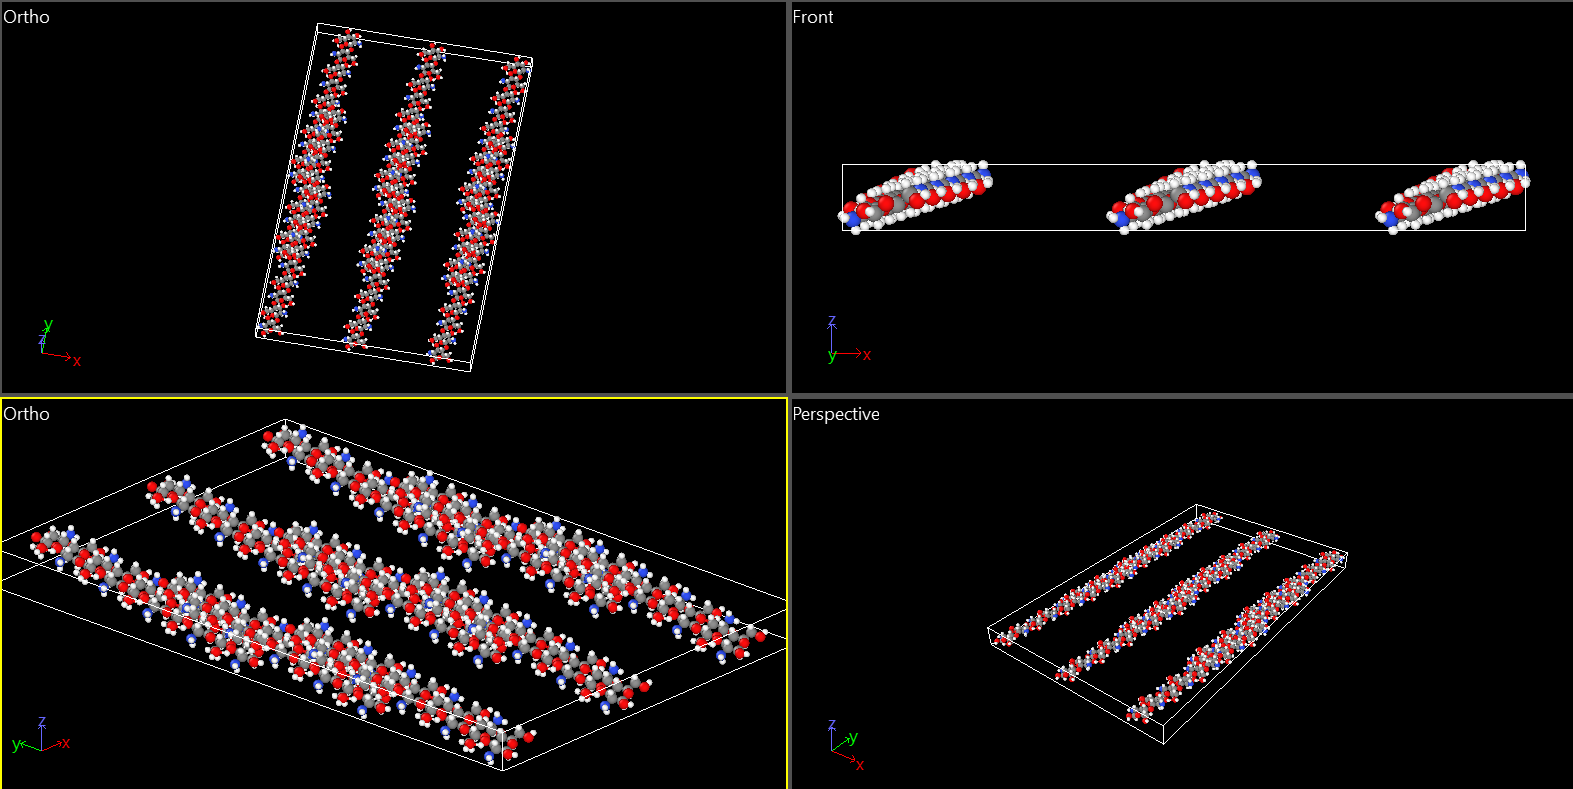 <br>

We have encountered a new problem. The way code was written - the polymers are not translated in **Z direction**. This was because the 3HB polymers are orientated in that direction. However, that is not the case for chitin and they are instead orientated in **Y direction**.


Lets see how the code for building 2x10 arrays that model layers works.

In [23]:
# Method to generate a 2x10 array of a polymer
# Example Usage: output = buidler.build_2_10_polymer_array(base_trimer_name, polymer_name, buffer) - note: the buffer is optional and the default is 10 angstroms!

output = builder.build_2_10_polymer_array("chitin_trimer", "chitin_10_polymer")

cd /home/dan/polymersimulator/pdb_files/molecules/chitin_trimer
Current directory: /home/dan/polymersimulator/pdb_files/molecules/chitin_trimer
chitin_2_10_array.intleap
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source chitin_2_10_array.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./chitin_2_10_array.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/minic

We can check the outputs as before - but let just visualsie the system. <br>

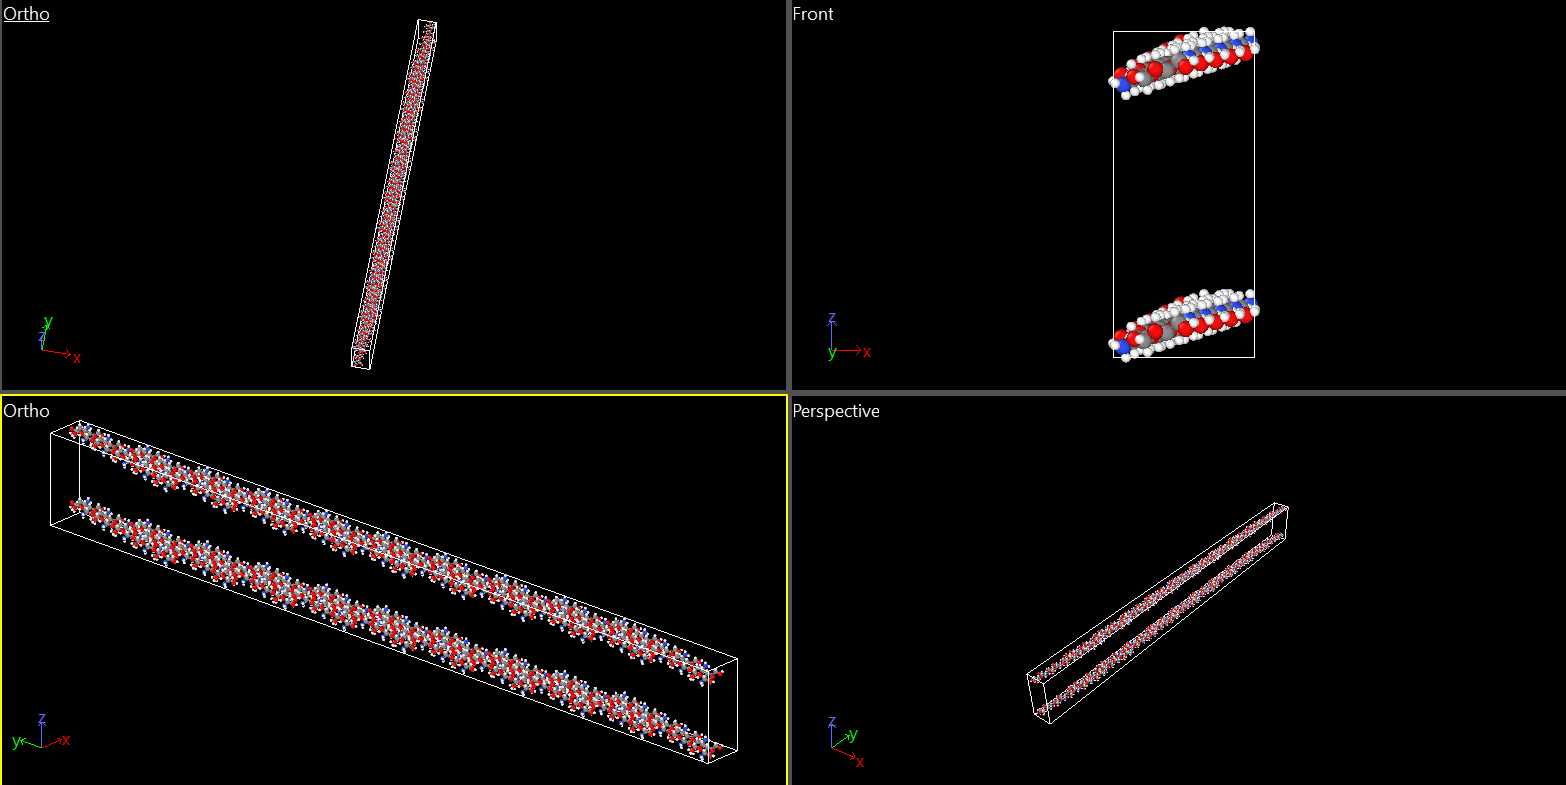 <br>

We have encountered the same problem...